## Exercise 01 : Line chart with styles ##

## Imports ##

In [1]:
import pandas as pd
import sqlite3

## Task #
Вам нужно создать такой же график, как на картинке в ReadMe.

* анализировать только пользователей, а не администраторов
* анализировать только даты, когда были и просмотры, и проверочные коммиты
* использовать размер шрифта 8
* размер фигуры (15,8)
* в конце вашего Jupyter Notebook создайте markdown-клетку и вставьте вопрос:
  “Сколько раз число просмотров было больше 150?” Вставьте: “Ответ
  ___”. Вставьте число вместо линий.


In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
df = pd.read_sql('SELECT * FROM pageviews WHERE uid LIKE "user%"', conn)
df.head()

,index,uid,datetime
0,12,user_30,2020-04-17 22:46:26.785035
1,14,user_14,2020-04-18 10:53:52.623447
2,15,user_17,2020-04-18 10:56:55.833899
3,16,user_14,2020-04-18 10:57:37.331258
4,18,user_17,2020-04-18 12:05:48.200144


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'] = df['datetime'].apply(lambda x: x.date())
views_per_day = df.groupby('datetime').size().reset_index(name='views_count')
views_per_day.columns = ['date', 'views']
views_per_day.head()

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1


In [5]:
commits_df = pd.read_sql('SELECT * FROM checker WHERE uid LIKE "user%"', conn)
commits_df.head()

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4


In [6]:
commits_df['timestamp'] = pd.to_datetime(commits_df['timestamp'])
commits_df['timestamp'] = commits_df['timestamp'].apply(lambda x: x.date())
commits_per_day = commits_df.groupby('timestamp').size().reset_index(name='commits_count')
commits_per_day.columns = ['date', 'commits']
commits_per_day.head()

,date,commits
0,2020-04-17,23
1,2020-04-18,69
2,2020-04-19,33
3,2020-04-20,25
4,2020-04-21,25


In [7]:
activity_monitoring = pd.merge(views_per_day, commits_per_day, on='date')
activity_monitoring

,date,views,commits
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28
5,2020-04-23,5,43
6,2020-04-25,1,104
7,2020-04-26,8,261
8,2020-04-28,2,5
9,2020-04-29,4,17


<Axes: title={'center': 'Views and commits per day'}, xlabel='date'>

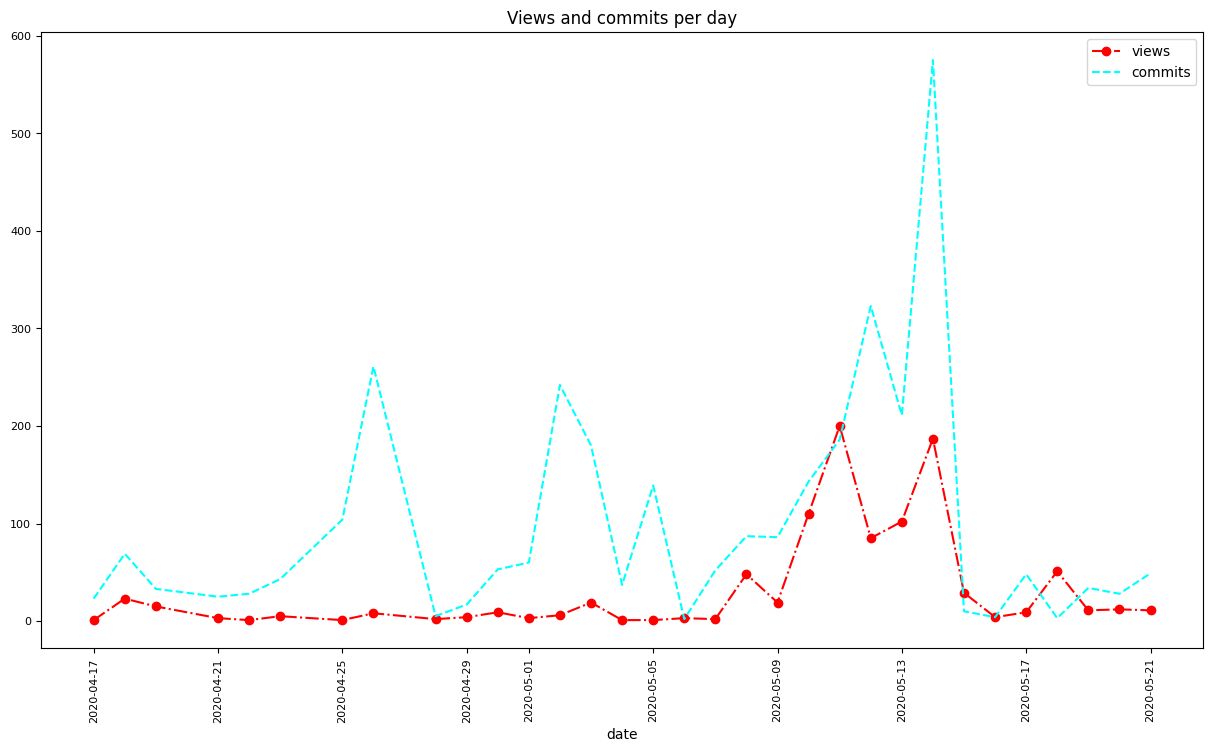

In [8]:
plt = activity_monitoring.plot(x='date', y=['views', 'commits'], figsize=(15,8), fontsize=8, title='Views and commits per day', rot=90, color=['red', 'cyan'], style=['o-.', '--'])
plt

In [9]:
conn.close()

## Сколько раз число просмотров было больше 150? ##

Ответ: 2 раза